## Neural network working

in this lab i will try to implement the neural network i have learned in this course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("deeplearning.mplstyle")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
coffee_df = pd.read_csv('coffe_df.csv')

In [3]:
coffee_df = coffee_df.drop("Unnamed: 0" ,axis = 1)

In [4]:
coffee_df

,0,1,y
0,185.317638,12.693965,1.0
1,259.920475,11.867664,0.0
2,231.013571,14.414242,0.0
3,175.366645,11.720587,0.0
4,187.120865,14.129732,1.0
...,...,...,...
195,223.781833,15.299167,0.0
196,266.627673,12.480510,0.0
197,273.683982,13.097562,0.0
198,220.610006,12.799891,1.0


In [5]:
y = np.array(coffee_df.y)

In [6]:
x = coffee_df[["0",'1']]

In [7]:
x = x.to_numpy()

In [8]:
x.shape

(200, 2)

In [9]:
x_pos = x[y == 1]

In [10]:
x_pos.shape

(43, 2)

In [11]:
x_neg = x [y ==0]
x_neg.shape

(157, 2)

In [12]:
plt.style.use("./deeplearning.mplstyle")

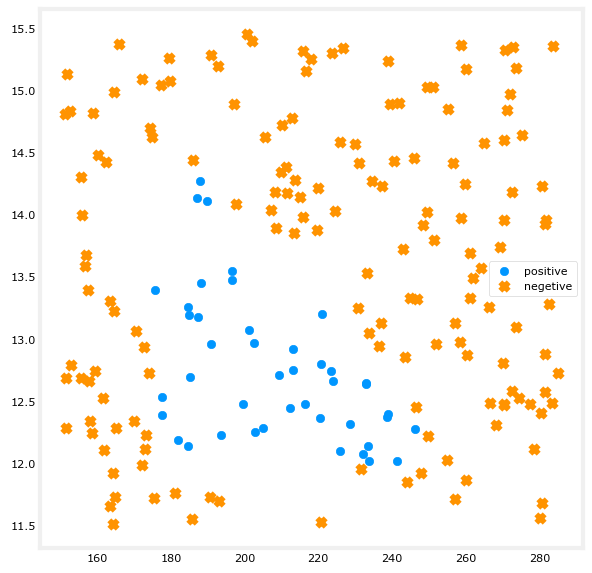

In [13]:
fig, ax = plt.subplots(figsize = (7,7))

ax.scatter( x = x_pos[:,0] , y = x_pos [:,1], marker='o', label = "positive" )
ax.scatter( x = x_neg[:,0] , y = x_neg [:,1], marker ='x', label = 'negetive')
ax.legend()

Normalize the data frame

In [14]:
temperatire_max = max(x[0])
temperatire_min = min(x[0])
print ("max temeperature point is ",temperatire_max, " and minimun temperature point is ", temperatire_min)
norm_tenser = tf.keras.layers.Normalization()
norm_tenser.adapt(x)
x_norm = norm_tenser(x)
print ('normalize max temp = ' , np.max(x_norm[:,0]), ' and min temperature ',np.min(x_norm[:,0]))



max temeperature point is  185.31763812365773  and minimun temperature point is  12.693964573656494
normalize max temp =  1.6597538  and min temperature  -1.6852188


In [15]:
x_norm.shape, x.shape, y.reshape((200,1))

(TensorShape([200, 2]),
 (200, 2),
 array([[1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],

In [16]:
xt = np.tile(x_norm,(1000,1))
yt = np.tile(y.reshape((200,1)),(1000,1))
print (f'the shape of new X {xt.shape} and new y is {yt.shape}')

the shape of new X (200000, 2) and new y is (200000, 1)


Creating my owm neural network
using sigmoid function

In [17]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

sigmoid(0)

0.5

In [18]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [19]:
x_norm[0]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.83455515, -0.6528792 ], dtype=float32)>

In [20]:
def dense(x: np.array([]),w,b):
    u = w.shape[1]
    #print('w.shape ', w.shape, " x.shape ", x.shape, " x ", x)
    out = np.zeros(u)
    for i in range(u):
        z = np.dot( x ,w[:,i]  ) + b[i]
        #print (z)
        out[i] = sigmoid(z)
    return out

dense(np.array(x_norm[0]),  W1_tmp, b1_tmp) 

array([9.09463285e-02, 8.63768551e-03, 4.74596771e-08])

In [21]:
def sequence (x, w1,b1,w2,b2):
    a1 = dense (x, w1, b1)
    a2 = dense (a1, w2, b2)
    return a2

In [22]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequence(X[i], W1, b1, W2, b2)
    return(p)

In [23]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_tenser(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [24]:
predictions

array([[9.71932366e-01],
       [3.28978619e-08]])

Creating nural network from tenser flow

In [25]:
tf.random.set_seed(1234)
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape= (2,)),
        Dense(3, activation = 'sigmoid', name = 'layer1'),
        Dense(1, activation = 'sigmoid', name = 'layer2')
        
    ]
    
)


In [26]:
# model insight function 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [48]:
#model in very basic steps
activation_fuc =  'sigmoid'

layer1 = Dense (5, activation= activation_fuc, name = "layer1")
layer2 = Dense (4, activation= activation_fuc, name = 'layer2')
layer3 = Dense (1, activation= activation_fuc, name = 'output')

model1 = Sequential ([
                        tf.keras.Input(shape = (2,)),
                        layer1, layer2, layer3
])

#model1.add(tf.keras.Input(shape =(2,1)))


In [49]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 15        
                                                                 
 layer2 (Dense)              (None, 4)                 24        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [40]:
# getting the weights of layers form the neural network

w1, b1 = model.get_layer("layer1").get_weights()
w2, b2 = model.get_layer('layer2').get_weights()

In [41]:
print(f'shape of w1 = {w1.shape} \nvalues of w1 = {w1} ')
print(f'values of b1 = {b1}')
print(f''' shape of w2 = {w2.shape}
Values of w1 = {w1}
values of b1 = {b1}

''')

shape of w1 = (2, 3) 
values of w1 = [[ 0.56973207 -0.6055119  -0.9943565 ]
 [ 1.0484681  -0.74712586 -1.039218  ]] 
values of b1 = [0. 0. 0.]
 shape of w2 = (3, 1)
Values of w1 = [[ 0.56973207 -0.6055119  -0.9943565 ]
 [ 1.0484681  -0.74712586 -1.039218  ]]
values of b1 = [0. 0. 0.]




In [ ]:
#multi layer model creating using for loop

dens = np.random.randint(low = 1 , high = 25, size = 100 )
dense_arr = np.array([])
for i in range(len(dens - 1 )):
    dense_arr = np.append(dense_arr, Dense(dens[i], activation = activation_fuc, name = f'layer{i}' ) )
dense_arr = np.append(dense_arr, Dense(1, activation = activation_fuc, name = f'output' ))
den_list = list (dense_arr)

In [ ]:
dense_arr

In [31]:
model3 = Sequential()
model3.add (tf.keras.Input (shape= (2,)),)
for i in range (len (dense_arr)):
    model3.add(
            
            dense_arr[i]
    )

NameError: name 'dense_arr' is not defined

In [ ]:
model3.summary()

In [ ]:
model.compile(
            loss= tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)



In [ ]:
model.fit(
    xt, yt,
    epochs = 10
)

In [32]:
model1.compile(
            loss= tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)

model1.fit(
    xt, yt,
    epochs = 10
)

Epoch 1/10
6250/6250 [==============================] - 16s 2ms/step - loss: 0.1481
Epoch 2/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0219
Epoch 3/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0047
Epoch 4/10
6250/6250 [==============================] - 14s 2ms/step - loss: 0.0012
Epoch 5/10
6250/6250 [==============================] - 16s 2ms/step - loss: 3.2613e-04
Epoch 6/10
6250/6250 [==============================] - 17s 3ms/step - loss: 4.1791e-05
Epoch 7/10
6250/6250 [==============================] - 16s 3ms/step - loss: 1.7222e-04
Epoch 8/10
6250/6250 [==============================] - 16s 3ms/step - loss: 5.4294e-04
Epoch 9/10
6250/6250 [==============================] - 15s 2ms/step - loss: 5.6815e-06
Epoch 10/10
6250/6250 [==============================] - 15s 2ms/step - loss: 4.7167e-04


### I have seen  that increasing the hidden layer will increase the perfomance of th \nural network. but a huge number of hidden layer also decrease the perfomance significantely. Model3 consumes the most of the time and error rate as about 50%

In [ ]:
model.get_weights()

In [ ]:
model1.get_weights()

In [ ]:
model3.get_weights()

In [ ]:
# hyper parameter provided in lab
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])